In [115]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("http://localhost:5001")



plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('Automobile_data.csv')

In [66]:
data.shape

(205, 26)

In [67]:
# we have just 205 examples and 25 features excluding the target variable

In [68]:
data.dtypes.value_counts()

object     16
int64       5
float64     5
Name: count, dtype: int64

In [69]:
data.select_dtypes(include=['object']).head()

normalized-losses         make fuel-type aspiration num-of-doors  \
0                 ?  alfa-romero       gas        std          two   
1                 ?  alfa-romero       gas        std          two   
2                 ?  alfa-romero       gas        std          two   
3               164         audi       gas        std         four   
4               164         audi       gas        std         four   

    body-style drive-wheels engine-location engine-type num-of-cylinders  \
0  convertible          rwd           front        dohc             four   
1  convertible          rwd           front        dohc             four   
2    hatchback          rwd           front        ohcv              six   
3        sedan          fwd           front         ohc             four   
4        sedan          4wd           front         ohc             five   

  fuel-system  bore stroke horsepower peak-rpm  price  
0        mpfi  3.47   2.68        111     5000  13495  
1        mpfi  3.47   2.68        111     5000  16500  
2        mpfi  2.68   3.47        154     5000  16500  
3        mpfi  3.19    3.4        102     5500  13950  
4        mpfi  3.19    3.4        115     5500  17450

In [70]:
# let's see which object columns are actually categorical

In [71]:
data['normalized-losses'].value_counts().head(15)

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
Name: count, dtype: int64

In [72]:
# this one seems numberic, we will replace ? with nan and convert to float
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')

In [73]:
# same is with bore, stroke, peak-rpm, horsepower and price variables
for col in ['bore', 'stroke', 'peak-rpm', 'horsepower', 'price']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [74]:
data.select_dtypes(include=['object']).head()

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine-location engine-type num-of-cylinders fuel-system  
0           front        dohc             four        mpfi  
1           front        dohc             four        mpfi  
2           front        ohcv              six        mpfi  
3           front         ohc             four        mpfi  
4           front         ohc             five        mpfi

In [75]:
# now we have only real categories left as object columns and we can perform MCA on them

In [76]:
data_cat = data.select_dtypes(include=['object'])

# Categorical features analysis

/Users/adima/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adima/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='make', ylabel='price'>

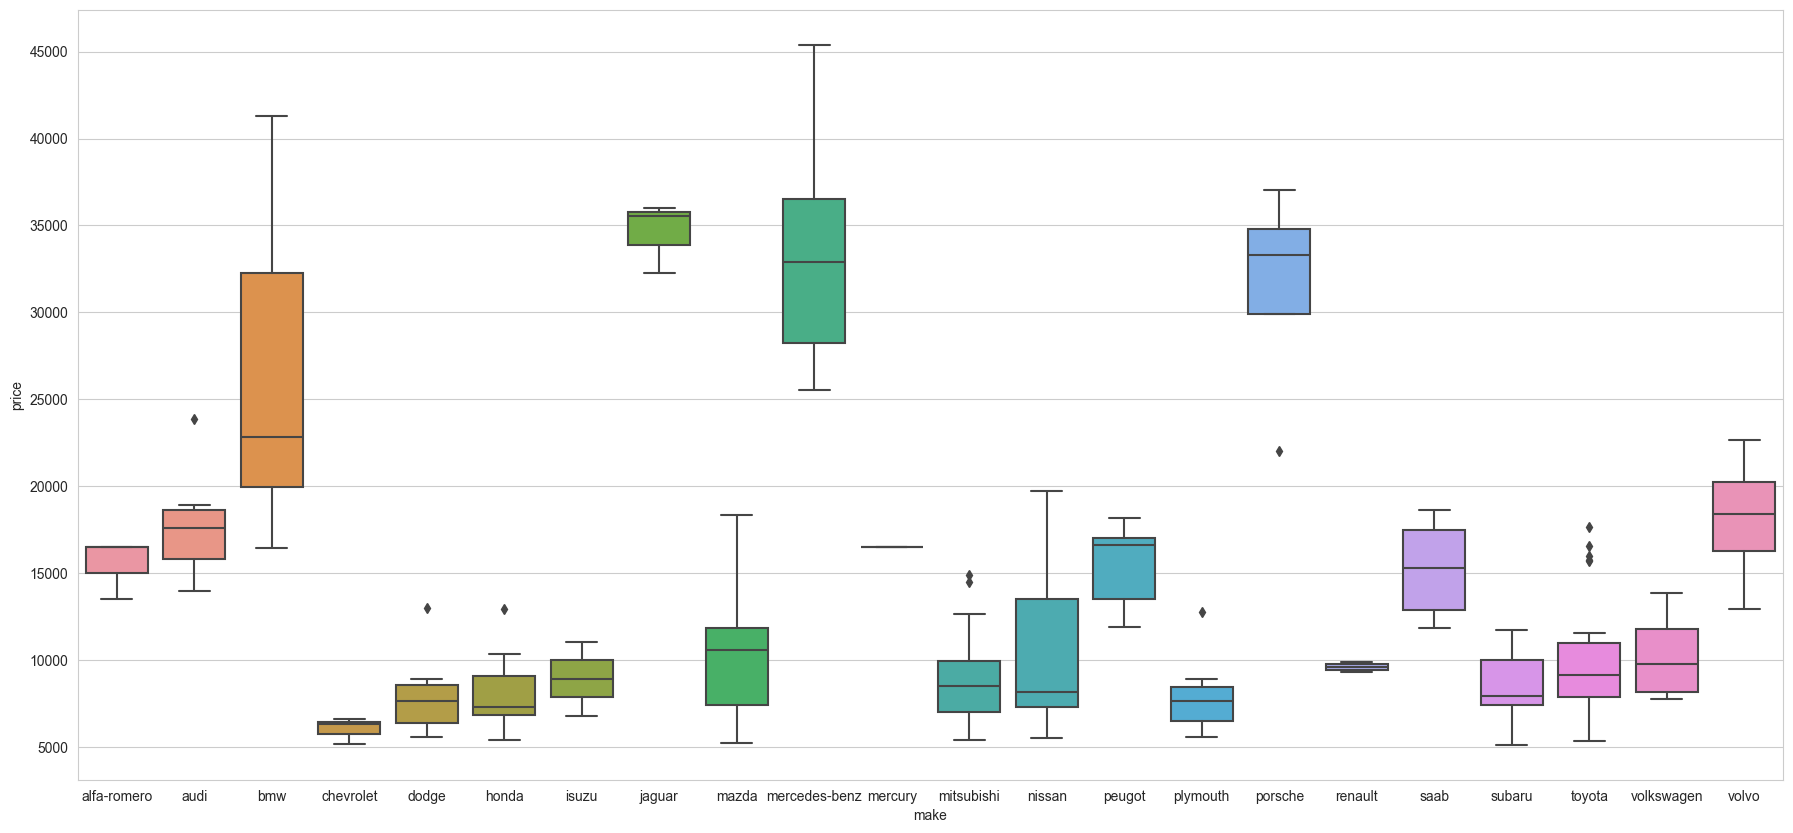

In [107]:
plt.figure(figsize=(22, 10))
sns.boxplot(x="make", y="price", data=data)


<Axes: xlabel='body-style', ylabel='price'>

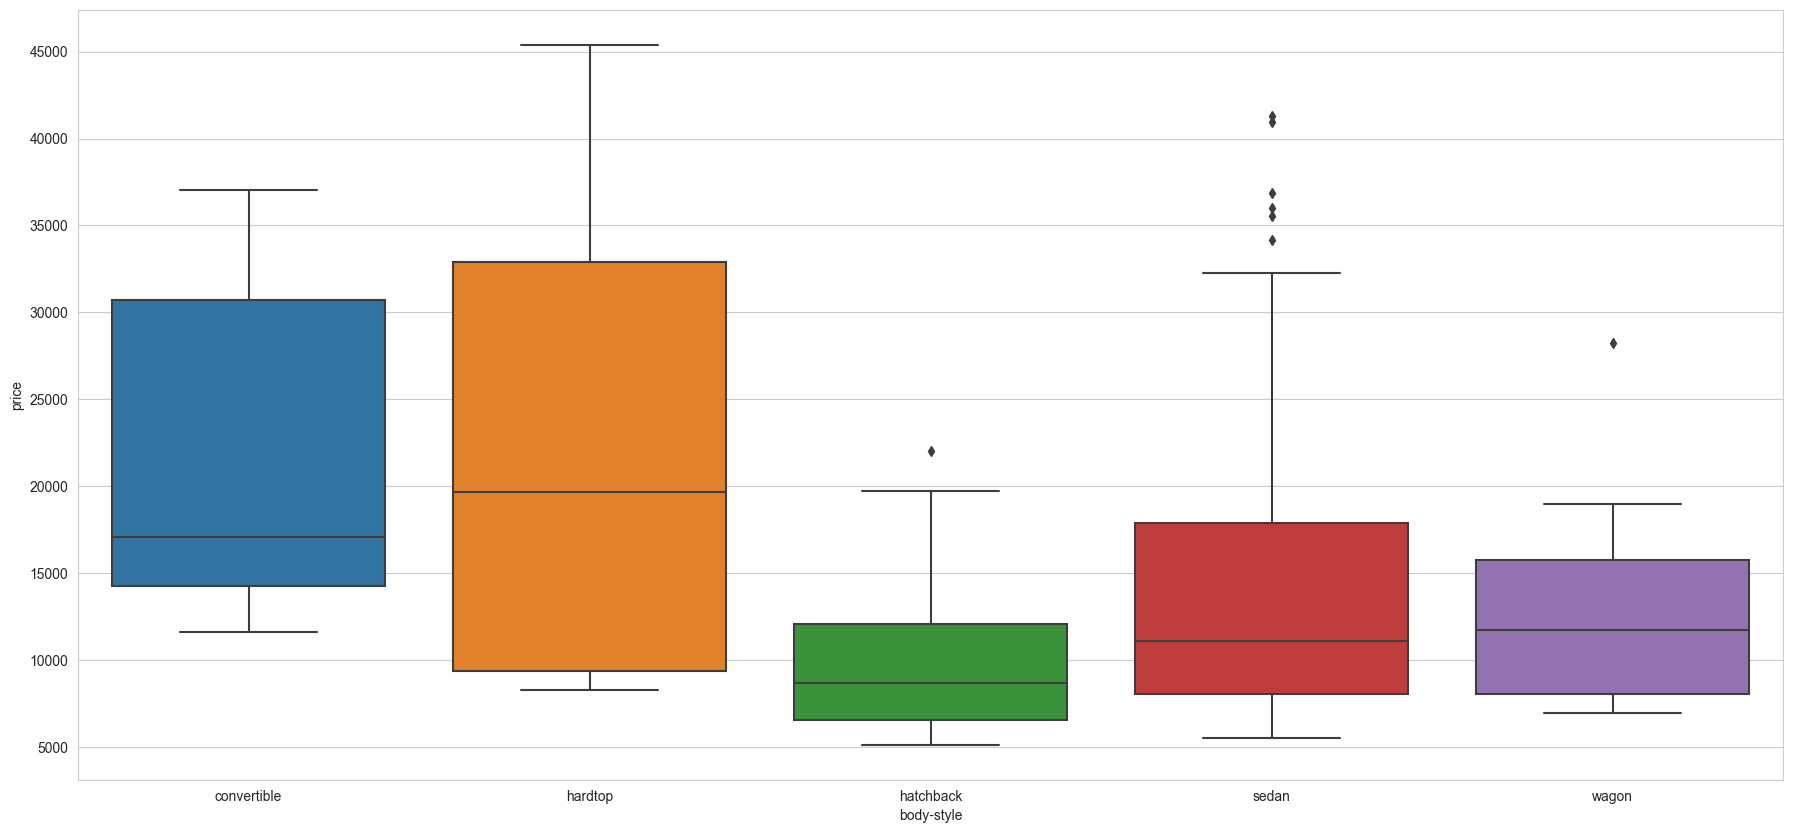

In [110]:
plt.figure(figsize=(22, 10))
sns.boxplot(x="body-style", y="price", data=data)


## MCA

In [77]:
mca = prince.MCA(
    n_components=2,  # the number of components to keep, in this case, 2
    n_iter=3,  # number of iterations, you might need to increase this for larger data
    copy=True,  # whether to overwrite the original data
    check_input=True,  # check for NaNs and other common issues
    engine='sklearn',  
)

# Fit and transform the data
mca_data = mca.fit_transform(data_cat)

# The result is a new DataFrame with the transformed data
print(mca_data)


            0         1
0    0.099393  1.118315
1    0.099393  1.118315
2    0.140031  1.171303
3   -0.145777 -0.205775
4   -0.434188 -0.096605
..        ...       ...
200 -0.293406  0.173223
201 -0.483394  0.130375
202 -0.404186  0.842811
203 -1.152429  0.269161
204 -0.483394  0.130375

[205 rows x 2 columns]


In [ ]:
mca = prince.MCA(
    n_components=2,  # the number of components to keep, in this case, 2
    n_iter=3,  # number of iterations, you might need to increase this for larger data
    copy=True,  # whether to overwrite the original data
    check_input=True,  # check for NaNs and other common issues
    engine='sklearn',  
)

# Fit and transform the data
mca_data = mca.fit_transform(data_cat)

# The result is a new DataFrame with the transformed data
print(mca_data)


            0         1
0    0.099393  1.118315
1    0.099393  1.118315
2    0.140031  1.171303
3   -0.145777 -0.205775
4   -0.434188 -0.096605
..        ...       ...
200 -0.293406  0.173223
201 -0.483394  0.130375
202 -0.404186  0.842811
203 -1.152429  0.269161
204 -0.483394  0.130375

[205 rows x 2 columns]


In [78]:
mca.eigenvalues_summary


eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.348         6.83%                      6.83%
1              0.340         6.66%                     13.50%

We see that two first components of MCA explain quite a small amount of variance, which means that these components do not capture a significant amount of the underlying structure or relationships within the data. The data may have a complex structure with no few dominant underlying dimensions and so  a higher-dimensional solution might be necessary to better capture the relationships in the data.

In [111]:
mca.plot(
    data_cat,
    x_component=0,
    y_component=1
)

alt.Chart(...)

On this plot we can spot certain groups of variables with similar profile, and examples associated with them. For example there are examples for which `make_isuzu` and `make_chevrolet` variables are important. However, given low explained variance, we should treat such conclusions with care.

# Numerical fearues analysis

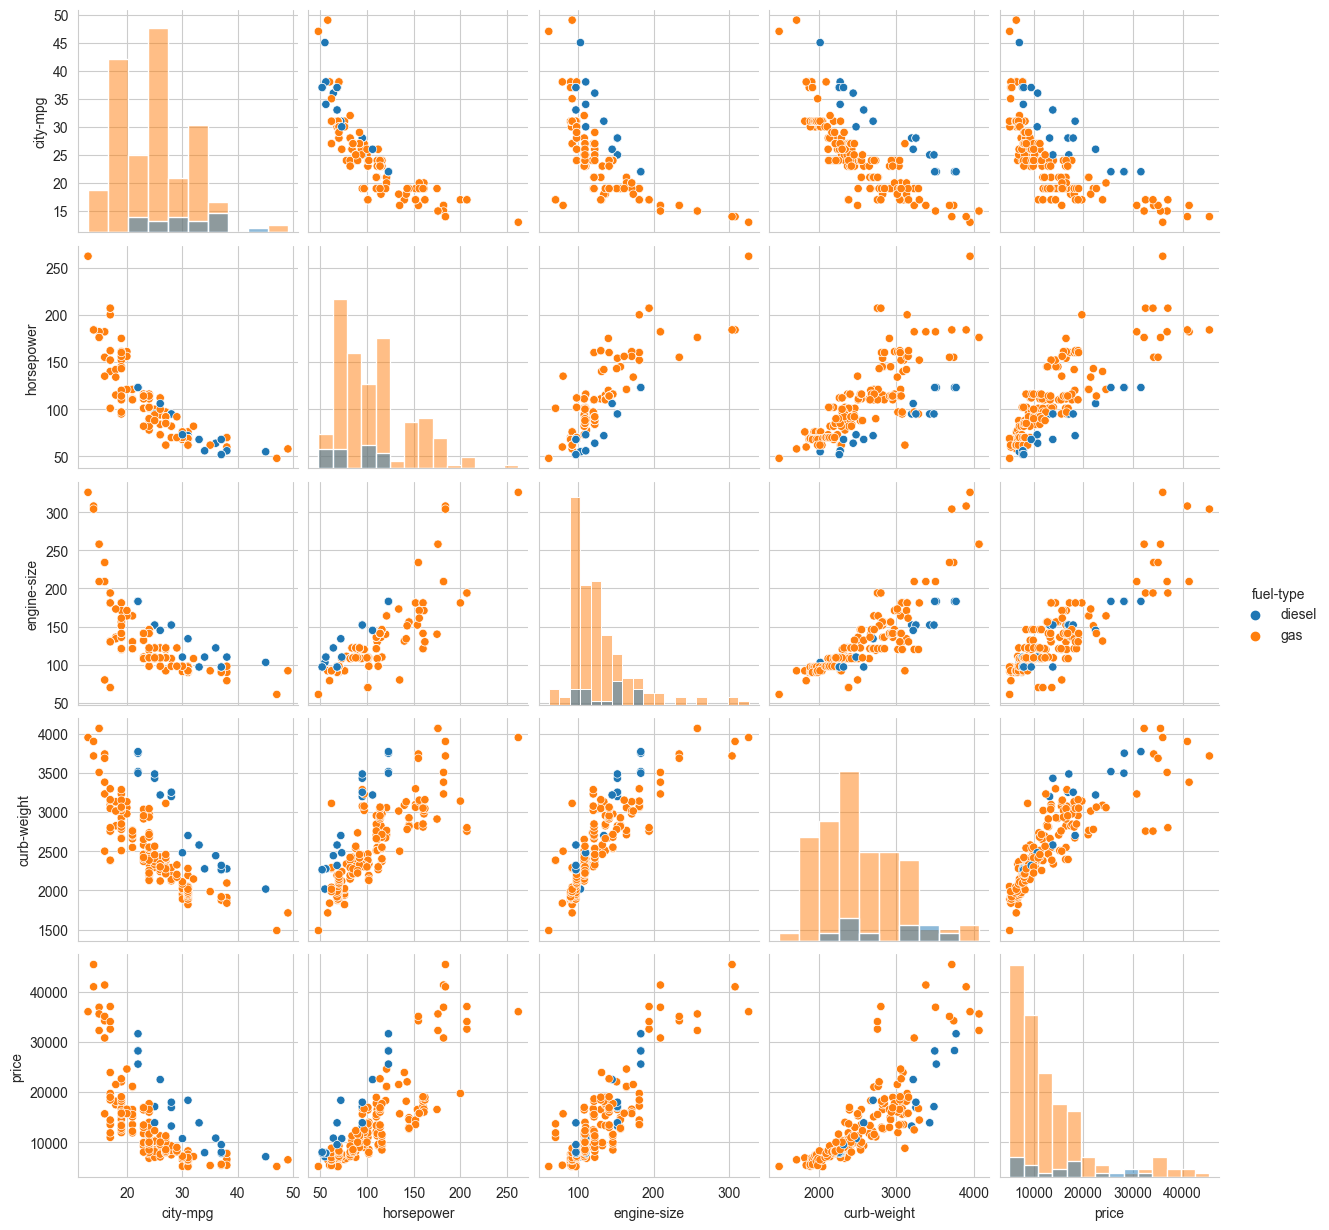

In [113]:
g = sns.pairplot(data[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")


# Model

## Train

In [80]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [81]:
for col in data_cat.columns:
    data[col] = data[col].astype('category')

In [98]:
cat_cols = data.select_dtypes(include=['category']).columns.tolist()

There are variables `num-of-cylinders` and `num-of-doors` that are initially categorical, but they are ordinal. In order to account for oridnality we need to convert them to integers

In [83]:
data['num-of-cylinders'].dtype

CategoricalDtype(categories=['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'], ordered=False, categories_dtype=object)

In [84]:
data['num-of-doors'].dtype

CategoricalDtype(categories=['?', 'four', 'two'], ordered=False, categories_dtype=object)

In [85]:
convert_number_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6,
                        'eight': 8, 'twelve': 12, '?': -1}

In [86]:
data['num-of-cylinders'] = data['num-of-cylinders'].replace(convert_number_map).astype(int)
data['num-of-doors'] = data['num-of-doors'].replace(convert_number_map).astype(int)

In [87]:
target_col = 'price'

In [88]:
data[target_col].isnull().sum()

4

In [89]:
# dropping rows with missing target
data.dropna(subset=[target_col], inplace=True)

In [90]:
data[target_col].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [91]:
X, y = data.drop(target_col, axis=1), data[target_col]

In [92]:
X_train, X_tst_val, y_train, y_tst_val = train_test_split(X, y, test_size=0.4, random_state=42)

In [93]:
X_val, X_test, y_val, y_test = train_test_split(X_tst_val, y_tst_val, test_size=0.5, random_state=42)

In [94]:
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    random_seed=42,
    use_best_model=True,
    eval_metric='MAE', 
    early_stopping_rounds=50,
)

In [99]:
model.fit(
    X_train, y_train,
    cat_features=cat_cols,
    eval_set=(X_val, y_val),
    verbose=10,
)

0:	learn: 4983.5293770	test: 6468.9599503	best: 6468.9599503 (0)	total: 2.7ms	remaining: 2.69s
10:	learn: 3020.6540410	test: 3993.6298603	best: 3993.6298603 (10)	total: 26ms	remaining: 2.34s
20:	learn: 2075.8213643	test: 2843.4138505	best: 2843.4138505 (20)	total: 64.6ms	remaining: 3.01s
30:	learn: 1614.6431398	test: 2373.2860463	best: 2373.2860463 (30)	total: 76.8ms	remaining: 2.4s
40:	learn: 1325.4828297	test: 2160.3927695	best: 2160.3927695 (40)	total: 90.4ms	remaining: 2.11s
50:	learn: 1146.2703262	test: 1998.7788717	best: 1998.7788717 (50)	total: 105ms	remaining: 1.96s
60:	learn: 1023.3738886	test: 1915.2235046	best: 1915.2235046 (60)	total: 118ms	remaining: 1.81s
70:	learn: 939.3414923	test: 1879.3049278	best: 1879.1245337 (68)	total: 131ms	remaining: 1.71s
80:	learn: 841.7660759	test: 1850.2375776	best: 1846.8640803 (78)	total: 147ms	remaining: 1.67s
90:	learn: 775.4917075	test: 1820.6652235	best: 1820.2957617 (89)	total: 163ms	remaining: 1.63s
100:	learn: 712.0153443	test: 1797

## Metrics on test

In [100]:
# calculate the MAE on test data
test_preds = model.predict(X_test)
mae = (abs(test_preds - y_test)).mean()
print('MAE: {:.4f}'.format(mae))

MAE: 1582.8644


## Push to MLflow

We are logging the model to mlflow instance deployed via docker-compose

In [31]:
os.environ['AWS_ACCESS_KEY_ID'] = 'IAM_ACCESS_KEY'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'IAM_SECRET_KEY'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000'  

mlflow.sklearn.log_model(model, "catboost_model")

We then manually save the model to mlflow registry under name `car_price` and set model's stage Production to be later used in fastapi app

### Sanity check

We check that we can load the model by that URI

In [34]:
# check that model exists in the registry
import mlflow.pyfunc
model_uri = "models:/car_price/Production"
model = mlflow.pyfunc.load_model(model_uri)

/Users/adima/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model

mlflow.pyfunc.loaded_model:
  artifact_path: catboost_model
  flavor: mlflow.sklearn
  run_id: e2c38e4bd9ef4f5b92bb9772a1e0c492

We can use the following sample command to get the prediction from our service:

 ```bash
 curl -X POST "http://localhost:8000/predict" -H "accept: application/json" -H "Content-Type: application/json" -d '{"features": {"symboling": 3, "normalized-losses": "nan", "make": "alfa-romero", "fuel-type": "gas", "aspiration": "std", "num-of-doors": "two", "body-style": "convertible", "drive-wheels": "rwd", "engine-location": "front", "wheel-base": 88.6, "length": 168.8, "width": 64.1, "height": 48.8, "curb-weight": 2548, "engine-type": "dohc", "num-of-cylinders": "four", "engine-size": 130, "fuel-system": "mpfi", "bore": 3.47, "stroke": 2.68, "compression-ratio": 9.0, "horsepower": 111.0, "peak-rpm": 5000.0, "city-mpg": 21}}'
 ```

Output: {"prediction":[13951.274475139522]}